In [149]:
import pandas as pd

In [150]:
data = pd.read_csv('train_dataset/energy_efficiency_data.csv')
data.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load,Unnamed: 10,Unnamed: 11
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33,NaN,NaN
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33,NaN,NaN
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33,NaN,NaN
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33,NaN,NaN
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28,NaN,NaN


In [151]:
data.shape

(1296, 12)

In [152]:
data.iloc[:,-1].isnull().sum()

1296

In [153]:
data.iloc[:,-2].isnull().sum()

1296

In [154]:
data.drop(['Unnamed: 10', 'Unnamed: 11'], axis='columns', inplace=True)

In [155]:
data.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28


In [156]:
data.shape

(1296, 10)

In [157]:
data.isnull().sum()

Relative_Compactness         528
Surface_Area                 528
Wall_Area                    528
Roof_Area                    528
Overall_Height               528
Orientation                  528
Glazing_Area                 528
Glazing_Area_Distribution    528
Heating_Load                 528
Cooling_Load                 528
dtype: int64

In [158]:
data.dropna(inplace=True)

In [159]:
data.shape

(768, 10)

In [160]:
data.isna().sum()

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

In [161]:
data_not_scaled = data.copy()

In [162]:
data.describe().loc[['min','max']]

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
min,0.62,514.5,245.0,110.25,3.5,2.0,0.0,0.0,6.01,10.90
max,0.98,808.5,416.5,220.50,7.0,5.0,0.4,5.0,43.10,48.03


In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

In [164]:
X = data.drop(['Heating_Load', 'Cooling_Load'], axis='columns')
X

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5.0,0.4,5.0
764,0.62,808.5,367.5,220.50,3.5,2.0,0.4,5.0
765,0.62,808.5,367.5,220.50,3.5,3.0,0.4,5.0
766,0.62,808.5,367.5,220.50,3.5,4.0,0.4,5.0


In [165]:
y = data[['Heating_Load', 'Cooling_Load']]
y

,Heating_Load,Cooling_Load
0,15.55,21.33
1,15.55,21.33
2,15.55,21.33
3,15.55,21.33
4,20.84,28.28
...,...,...
763,17.88,21.40
764,16.54,16.88
765,16.44,17.11
766,16.48,16.61


In [166]:
from sklearn.preprocessing import MinMaxScaler

def scale_X(scaler, data):
    data_columns = data.columns
    return pd.DataFrame(scaler.transform(data), columns=data_columns)

def inverse_scaling_X(scaler, data):
    data_columns = data.columns
    return pd.DataFrame(scaler.inverse_transform(data), columns=data_columns)

scaler = MinMaxScaler()
scaler.fit(X)

MinMaxScaler()

In [167]:
def scale_y(y_Heating_Load, y_Cooling_Load):
    y_Heating_Load = y_Heating_Load / 100
    y_Cooling_Load = y_Cooling_Load / 100

    return y_Heating_Load, y_Cooling_Load

def inverse_y_scalling(y_Heating_Load, y_Cooling_Load):
    y_Heating_Load = y_Heating_Load * 100
    y_Cooling_Load = y_Cooling_Load * 100

    return y_Heating_Load, y_Cooling_Load

In [168]:
X = scale_X(scaler, X)

In [169]:
y['Heating_Load'], y['Cooling_Load'] = scale_y(y['Heating_Load'], y['Cooling_Load'])

<ipython-input-169-c53f886f03d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Heating_Load'], y['Cooling_Load'] = scale_y(y['Heating_Load'], y['Cooling_Load'])


In [170]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
y_train_Heating_Load = y_train['Heating_Load']
y_train_Cooling_Load = y_train['Cooling_Load']
y_test_Heating_Load = y_test['Heating_Load']
y_test_Cooling_Load = y_test['Cooling_Load']
print(y_train_Heating_Load.shape, y_train_Cooling_Load.shape, y_test_Heating_Load.shape, y_test_Cooling_Load.shape)

(614, 8) (154, 8) (614, 2) (154, 2)
(614,) (614,) (154,) (154,)


In [171]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [172]:
Heating_Load_Liniar_Regressor = LinearRegression()
Heating_Load_Liniar_Regressor.fit(X_train, y_train_Heating_Load)
Heating_Load_Liniar_Regressor.score(X_test, y_test_Heating_Load)

0.909476743425551

In [173]:
Cooling_Load_Liniar_Regressor = LinearRegression()
Cooling_Load_Liniar_Regressor.fit(X_train, y_train_Cooling_Load)
Cooling_Load_Liniar_Regressor.score(X_test, y_test_Cooling_Load)

0.8697977996237696

In [174]:
Heating_Load_Decision_Tree_Regressor = DecisionTreeRegressor()
Heating_Load_Decision_Tree_Regressor.fit(X_train, y_train_Heating_Load)
Heating_Load_Decision_Tree_Regressor.score(X_test, y_test_Heating_Load)

0.9970170245092055

In [175]:
Cooling_Load_Decision_Tree_Regressor = DecisionTreeRegressor()
Cooling_Load_Decision_Tree_Regressor.fit(X_train, y_train_Cooling_Load)
Cooling_Load_Decision_Tree_Regressor.score(X_test, y_test_Cooling_Load)

0.9458500259806855

In [176]:
Heating_Load_Random_Forest_Regressor = RandomForestRegressor()
Heating_Load_Random_Forest_Regressor.fit(X_train, y_train_Heating_Load)
Heating_Load_Random_Forest_Regressor.score(X_test, y_test_Heating_Load)

0.9975389255430314

In [177]:
Cooling_Load_Random_Forest_Regressor = RandomForestRegressor()
Cooling_Load_Random_Forest_Regressor.fit(X_train, y_train_Cooling_Load)
Cooling_Load_Random_Forest_Regressor.score(X_test, y_test_Cooling_Load)

0.9721127925261309

In [178]:
import keras

Text(0, 0.5, 'loss')

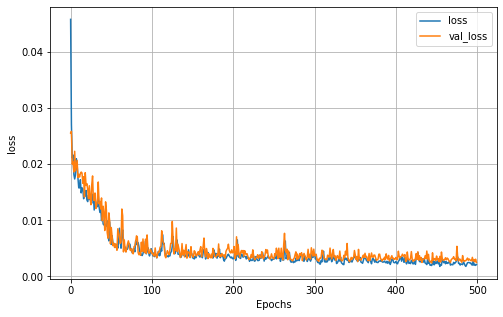

In [179]:
Heating_Load_Neural_Network = keras.Sequential([
   keras.layers.Dense(300, activation = 'relu', input_shape = (8,)),
   keras.layers.Dense(150, activation = 'relu'),
   keras.layers.Dense(50, activation = 'relu'),
   keras.layers.Dense(10, activation = 'relu'),
   keras.layers.Dense(1)
])

Heating_Load_Neural_Network.compile(
    optimizer='Adam',
    loss='mae',
)

history = Heating_Load_Neural_Network.fit(
    X_train, y_train_Heating_Load,
    validation_data=(X_test, y_test_Heating_Load),
    epochs=500,
    verbose=0
)
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('loss')

Text(0, 0.5, 'loss')

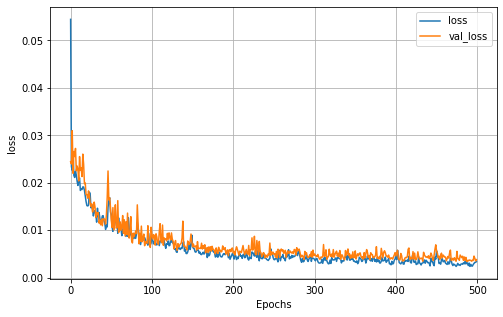

In [180]:
Cooling_Load_Neural_Network = keras.Sequential([
   keras.layers.Dense(300, activation = 'relu', input_shape = (8,)),
   keras.layers.Dense(150, activation = 'relu'),
   keras.layers.Dense(50, activation = 'relu'),
   keras.layers.Dense(10, activation = 'relu'),
   keras.layers.Dense(1) 
])

Cooling_Load_Neural_Network.compile(
    optimizer='Adam',
    loss='mae',
)

history = Cooling_Load_Neural_Network.fit(
    X_train, y_train_Cooling_Load,
    validation_data=(X_test, y_test_Cooling_Load),
    epochs=500,
    verbose=0
)
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('loss')

In [181]:
X = data_not_scaled.drop(['Heating_Load', 'Cooling_Load'], axis='columns')
y = data_not_scaled[['Heating_Load', 'Cooling_Load']]
y_Heating_Load = y['Heating_Load']
y_Cooling_Load = y['Cooling_Load']

In [182]:
import random

def test_predict(X, y, model, index = None):
    if index != None: 
        print(f'Predicted = {model.predict(X.iloc[index,:].values.reshape(1,8)) * 100}, True = {y.iloc[index] * 100}')
    else:
        index = random.randint(0, X.shape[0] - 1)
        print(f'Predicted = {model.predict(X.iloc[index,:].values.reshape(1,8)) * 100}, True = {y.iloc[index] * 100}')

In [183]:
print(Heating_Load_Liniar_Regressor.score(X_test, y_test_Heating_Load))
print(Cooling_Load_Liniar_Regressor.score(X_test, y_test_Cooling_Load))

print(Heating_Load_Decision_Tree_Regressor.score(X_test, y_test_Heating_Load))
print(Cooling_Load_Decision_Tree_Regressor.score(X_test, y_test_Cooling_Load))

print(Heating_Load_Random_Forest_Regressor.score(X_test, y_test_Heating_Load))
print(Cooling_Load_Random_Forest_Regressor.score(X_test, y_test_Cooling_Load))

print(Heating_Load_Neural_Network.evaluate(X_test, y_test_Heating_Load))
print(Cooling_Load_Neural_Network.evaluate(X_test, y_test_Cooling_Load))

0.909476743425551
0.8697977996237696
0.9970170245092055
0.9458500259806855
0.9975389255430314
0.9721127925261309
5/5 [==============================] - 0s 3ms/step - loss: 0.0025
0.0024814580101519823
5/5 [==============================] - 0s 3ms/step - loss: 0.0038
0.0037715183570981026


In [184]:
import joblib
joblib.dump(scaler, 'scaler/scaler.joblib')

['scaler/scaler.joblib']

In [185]:
joblib.dump(Heating_Load_Liniar_Regressor, 'models/Heating_Load_Liniar_Regressor.joblib')
joblib.dump(Cooling_Load_Liniar_Regressor, 'models/Cooling_Load_Liniar_Regressor.joblib')

joblib.dump(Heating_Load_Decision_Tree_Regressor, 'models/Heating_Load_Decision_Tree_Regressor.joblib')
joblib.dump(Cooling_Load_Decision_Tree_Regressor, 'models/Cooling_Load_Decision_Tree_Regressor.joblib')

joblib.dump(Heating_Load_Random_Forest_Regressor, 'models/Heating_Load_Random_Forest_Regressor.joblib')
joblib.dump(Cooling_Load_Random_Forest_Regressor, 'models/Cooling_Load_Random_Forest_Regressor.joblib')

['models/Cooling_Load_Random_Forest_Regressor.joblib']

In [186]:
Heating_Load_Neural_Network.save('models/Heating_Load_Neural_Network.h5')
Cooling_Load_Neural_Network.save('models/Cooling_Load_Neural_Network.h5')